### This notebook is modified based on https://colab.research.google.com/github/pytorch/pytorch.github.io/blob/master/assets/hub/nvidia_deeplearningexamples_ssd.ipynb

----------------------------------------------------------------------

# SSD

*Author: NVIDIA*

**Single Shot MultiBox Detector model for object detection**

_ | _
- | -
![alt](https://pytorch.org/assets/images/ssd_diagram.png) | ![alt](https://pytorch.org/assets/images/ssd.png)

# Please change to any resolution [width, height]

In [ ]:
############################### Please change to any resolution #####################################3
resolution=[150 , 221] # width, height


# Prepare a model

In [1]:
import torch

import numpy as np


from SSD_model import *
from SSD_utils import *
torch.set_printoptions(linewidth=120)

In [2]:
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [3]:
import torch
precision = 'fp32'
ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd', model_math=precision)
torch.save({'model_state_dict': ssd_model.state_dict()},'model.pth')

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [4]:
ssd_model = SSD300()
checkpoint = torch.load('model.pth')
ssd_model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [5]:
uris = [
    'http://images.cocodataset.org/val2017/000000397133.jpg',
    'http://images.cocodataset.org/val2017/000000037777.jpg',
    'http://images.cocodataset.org/val2017/000000252219.jpg'
]

In [6]:
inputs = [utils.prepare_input(uri) for uri in uris]
tensor = utils.prepare_tensor(inputs)

In [7]:
ssd_model.to('cuda');
ssd_model.eval();

# Preparing tensors & Inferencing

In [13]:
input2 = []
for i in range(3):
    input2.append(inputs[i][150-resolution[1]//2:150-resolution[1]//2+resolution[1]:,150-resolution[0]//2:150-resolution[0]//2+resolution[0]:,:])
tensor2 = utils.prepare_tensor(input2)

In [14]:
with torch.no_grad():
    detections_batch2 = ssd_model(tensor2)

In [15]:
results_per_input = decode_results(detections_batch2, [tensor2.size(2),tensor2.size(3)])
best_results_per_input = [utils.pick_best(results, 0.40) for results in results_per_input]

In [16]:
classes_to_labels = utils.get_coco_object_dictionary()

# Check Results

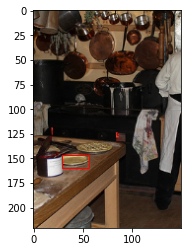

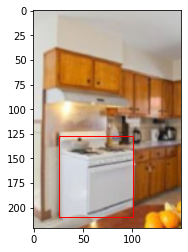

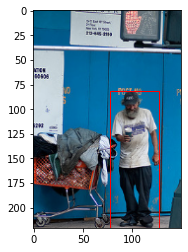

In [17]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

for image_idx in range(len(best_results_per_input)):
    fig, ax = plt.subplots(1)
    # Show original, denormalized image...
    image = input2[image_idx] / 2 + 0.5
    ax.imshow(image)
    # ...with detections
    bboxes, classes, confidences = best_results_per_input[image_idx]
    for idx in range(len(bboxes)):
        left, bot, right, top = bboxes[idx]
        x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        break
        ax.text(x, y, "{} {:.0f}%".format(classes_to_labels[classes[idx] - 1], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))
plt.show()